# Classification Model
You are provided with the Diabetes dataset containing diagnostic measurements ofpatients. The objective is to predict whether a patient has diabetes (Outcome: 1 = Yes, 0= No).

**Dataset Description**

• Pregnancies: Number of pregnancies

• Glucose: Glucose level in blood

• BloodPressure: Blood pressure measurement

• SkinThickness: Thickness of the skin

• Insulin: Insulin level in blood

• BMI: Body mass index

• DiabetesPedigreeFunction: Diabetes percentage

• Age: Age of the patient

• Outcome: Target variable (1 = Yes, 0 = No)

**Note**: The zeros in the dataset (except the target column) should be treated as missingvalues and imputed using a suitable method.

**Tasks**:

1. Understand and explore the dataset.
2. Perform preprocessing (handle missing values, scaling, etc.).
3. Apply different classification models.(Logistic Regression,kNN,SVM,Decision Tree etc)
4. Apply ensemble methods (Random Forest, Boosting, Bagging etc.).
5. Evaluate all models using metrics such as Accuracy, Precision, Recall, F1-score etc.
6. Identify the best-performing model and provide justification.

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# Loading data
data = pd.read_csv("/content/sample_data/diabetes.csv")
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [277]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [278]:
data.duplicated().sum()

np.int64(0)

In [279]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

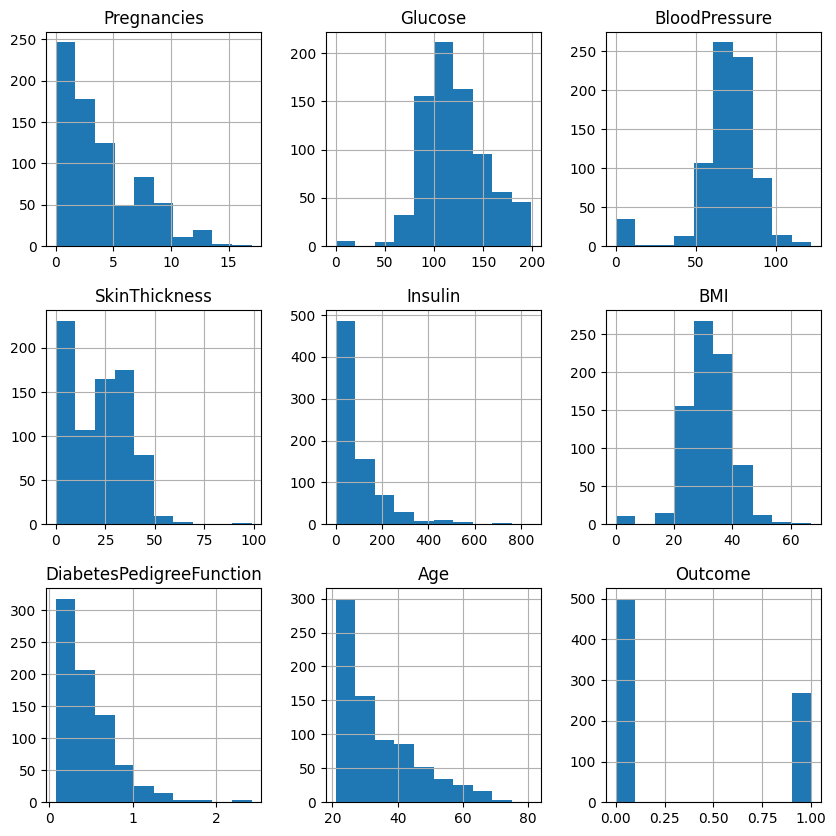

In [280]:
# Data explorartion
data.hist(figsize=(10,10))

<Axes: >

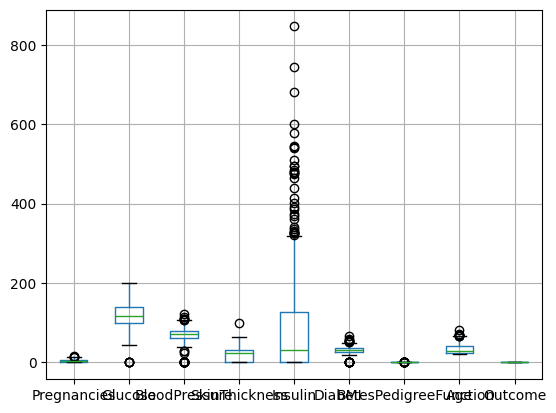

In [281]:
data.boxplot()

In [282]:
data.skew()

,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


<Axes: >

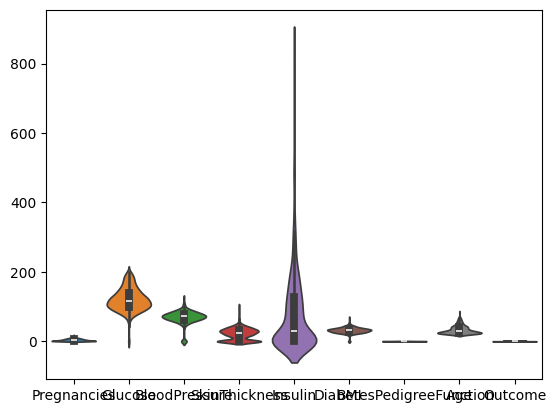

In [283]:
sns.violinplot(data)

In [284]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

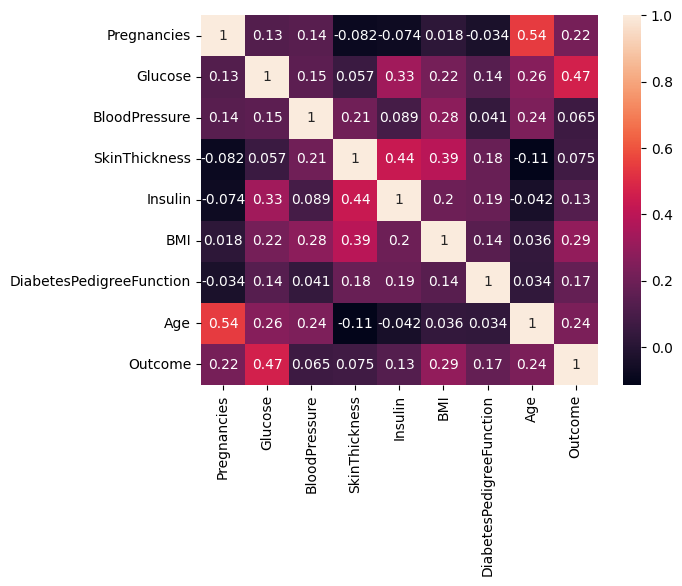

In [285]:
sns.heatmap(data.corr(),annot=True)

In [286]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [287]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [288]:
# Replace zeros with Mean
x = x.replace(0, x.mean())
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [289]:
# IQR
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1

# Filter outliers from x and y
outlier_mask = ~((x < (q1 - 1.5 * iqr)) | (x > (q3 + 1.5 * iqr))).any(axis=1)
x = x[outlier_mask]
y = y[outlier_mask]

x.skew()

,0
Pregnancies,0.826001
Glucose,0.650315
BloodPressure,0.125465
SkinThickness,0.742571
Insulin,1.318882
BMI,0.344908
DiabetesPedigreeFunction,0.997453
Age,1.093491


In [290]:
# Scaling
x_scaled = np.log1p(x)
x_scaled.skew()

,0
Pregnancies,-0.076198
Glucose,0.008721
BloodPressure,-0.316038
SkinThickness,-0.008813
Insulin,-0.386656
BMI,-0.141931
DiabetesPedigreeFunction,0.690969
Age,0.620452


In [291]:
# Data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y)

In [292]:
# Training classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = SVC()
model4 = DecisionTreeClassifier()


model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)


model1_y_pred = model1.predict(x_test)
model2_y_pred = model2.predict(x_test)
model3_y_pred = model3.predict(x_test)
model4_y_pred = model4.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [293]:
# Training Ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


model5 = RandomForestClassifier()
model6 = GradientBoostingClassifier()
model7 = AdaBoostClassifier()
model8 = BaggingClassifier()


model5.fit(x_train, y_train)
model6.fit(x_train, y_train)
model7.fit(x_train, y_train)
model8.fit(x_train, y_train)



model5_y_pred = model5.predict(x_test)
model6_y_pred = model6.predict(x_test)
model7_y_pred = model7.predict(x_test)
model8_y_pred = model8.predict(x_test)

In [294]:
# Evaluate all Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': model1_y_pred,
    'kNN': model2_y_pred,
    'SVM': model3_y_pred,
    'Decision Tree': model4_y_pred,
    'Random Forest': model5_y_pred,
    'Gradient Boosting': model6_y_pred,
    'AdaBoost': model7_y_pred,
    'Bagging': model8_y_pred
}

metrics = {}
for model_name, predictions in models.items():
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1-score': f1_score(y_test, predictions)
    }

metrics_df = pd.DataFrame(metrics).T
display(metrics_df)

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.830065,0.666667,0.666667,0.666667
kNN,0.797386,0.580000,0.743590,0.651685
SVM,0.803922,0.645161,0.512821,0.571429
Decision Tree,0.705882,0.428571,0.461538,0.444444
Random Forest,0.797386,0.583333,0.717949,0.643678
Gradient Boosting,0.823529,0.630435,0.743590,0.682353
AdaBoost,0.810458,0.604167,0.743590,0.666667
Bagging,0.849673,0.681818,0.769231,0.722892


**Insights**

The best performing model is Bagging with most Accuracy score and F1-score (0.849673 & 0.722892)